# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# added json import to pull examples from the API
import json
# will most likely change scipy.stats to import st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [58]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print("The cities list is just for me to test from.")
pprint(cities)

#Am I supposed to get 600 cities? I only get 1000 pings per day wit the API. 


Number of cities in the list: 588
The cities list is just for me to test from.
['iqaluit',
 'gizo',
 'port augusta',
 'asadabad',
 "hayma'",
 'arteche',
 'grytviken',
 'stanley',
 'tiksi',
 'uturoa',
 'hawaiian paradise park',
 'bethel',
 'avarua',
 'thinadhoo',
 'bayji',
 'utrik',
 'ilulissat',
 'margaret river',
 'poltavka',
 'el playon',
 'kingston',
 'punta arenas',
 'al hazm',
 'prineville',
 'twon-brass',
 'eyl',
 'port-aux-francais',
 'edinburgh of the seven seas',
 'bredasdorp',
 'luderitz',
 'georgetown',
 'udachny',
 'lakhipur',
 'arish',
 'college',
 'invercargill',
 'yellowknife',
 'port elizabeth',
 'hamilton',
 'mejit',
 'ushuaia',
 'olinda',
 'blackmans bay',
 'mullovka',
 'palmer',
 'remire-montjoly',
 'papatowai',
 'wailua homesteads',
 'sinabang',
 'massawa',
 'alice springs',
 'sorong',
 'adamstown',
 'lipljan',
 'constantia',
 'gorontalo',
 'severo-yeniseyskiy',
 'novodvinsk',
 'klyuchi',
 'miranda',
 'isafjordur',
 'atafu village',
 "port saint john's",
 'evora',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [59]:
# Making sure I am starting this right, and testing pulls. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"
test_city = np.random.choice(cities)

# Build query URL
query_url = url + "&appid=" + weather_api_key + "&q=" + test_city

# print(requests.get(query_url))
# Response 200 means that the request was successful

response = requests.get(query_url).json()
pprint(json.dumps(response, indent=4, sort_keys=True))

('{\n'
 '    "base": "stations",\n'
 '    "clouds": {\n'
 '        "all": 37\n'
 '    },\n'
 '    "cod": 200,\n'
 '    "coord": {\n'
 '        "lat": -21.15,\n'
 '        "lon": 55.2833\n'
 '    },\n'
 '    "dt": 1715117070,\n'
 '    "id": 6690297,\n'
 '    "main": {\n'
 '        "feels_like": 21.81,\n'
 '        "grnd_level": 1010,\n'
 '        "humidity": 68,\n'
 '        "pressure": 1022,\n'
 '        "sea_level": 1022,\n'
 '        "temp": 21.8,\n'
 '        "temp_max": 23.46,\n'
 '        "temp_min": 20.32\n'
 '    },\n'
 '    "name": "Saint-Leu",\n'
 '    "sys": {\n'
 '        "country": "RE",\n'
 '        "id": 2127,\n'
 '        "sunrise": 1715135943,\n'
 '        "sunset": 1715176299,\n'
 '        "type": 1\n'
 '    },\n'
 '    "timezone": 14400,\n'
 '    "visibility": 10000,\n'
 '    "weather": [\n'
 '        {\n'
 '            "description": "scattered clouds",\n'
 '            "icon": "03n",\n'
 '            "id": 802,\n'
 '            "main": "Clouds"\n'
 '        }\n'
 ' 

In [60]:
#My trials to get the data from the API

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | gizo
Processing Record 3 of Set 1 | port augusta
Processing Record 4 of Set 1 | asadabad
Processing Record 5 of Set 1 | hayma'
City not found. Skipping...
Processing Record 6 of Set 1 | arteche
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | thinadhoo
Processing Record 15 of Set 1 | bayji
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | poltavka
Processing Record 20 of Set 1 | el playon
Processing Record 21 of Set 1 | kingston
Processing Record 22 of Set 1 | punta arenas
Processing 

In [81]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [82]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,0.85,55,20,5.14,CA,1715117070
1,gizo,-8.1030,156.8419,28.26,83,89,6.82,SB,1715117070
2,port augusta,-32.5000,137.7667,14.34,60,83,2.84,AU,1715117070
3,asadabad,34.7824,48.1185,10.97,77,24,3.88,IR,1715117070
4,arteche,12.2645,125.4048,26.22,87,100,2.84,PH,1715117070


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,55,20,5.14,CA,1715117070
1,gizo,-8.1030,156.8419,28.26,83,89,6.82,SB,1715117070
2,port augusta,-32.5000,137.7667,14.34,60,83,2.84,AU,1715117070
3,asadabad,34.7824,48.1185,10.97,77,24,3.88,IR,1715117070
4,arteche,12.2645,125.4048,26.22,87,100,2.84,PH,1715117070


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

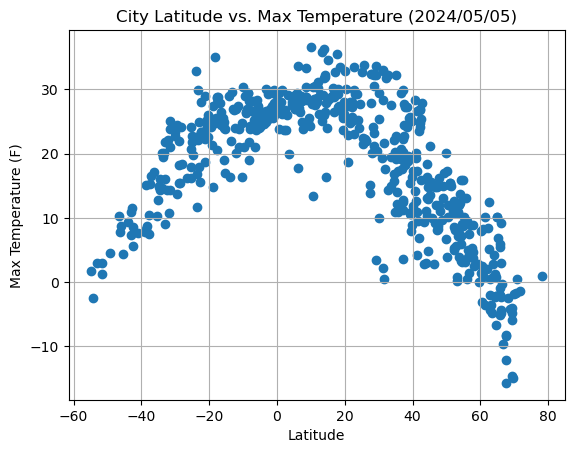

In [85]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

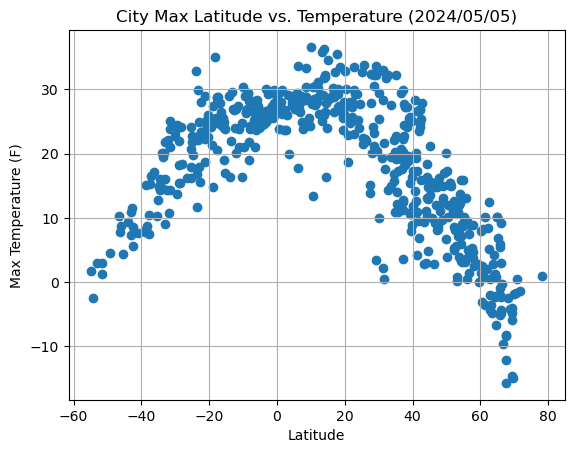

In [66]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

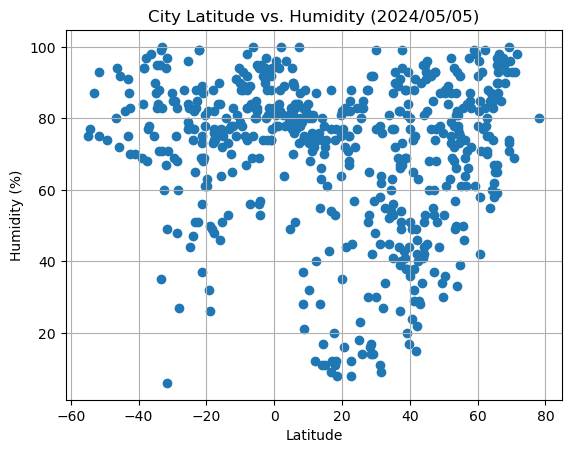

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

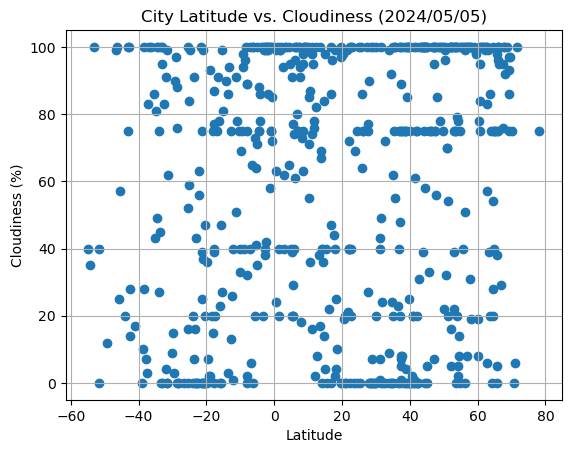

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

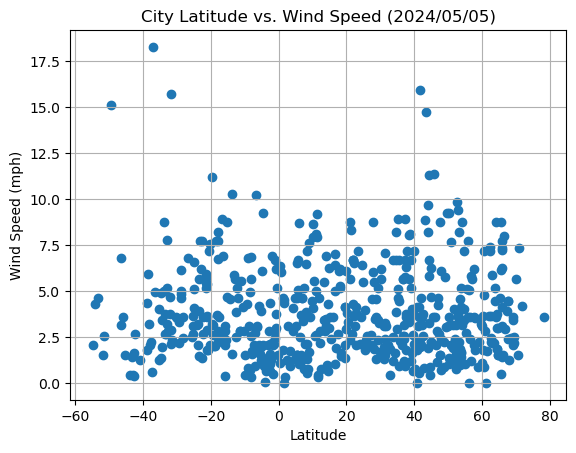

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024/05/05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
# !!! Ask about this one !!! 

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,55,20,5.14,CA,1715117070
3,asadabad,34.7824,48.1185,10.97,77,24,3.88,IR,1715117070
4,arteche,12.2645,125.4048,26.22,87,100,2.84,PH,1715117070
6,stanley,54.8680,-1.6985,8.77,92,0,1.03,GB,1715117071
7,tiksi,71.6872,128.8694,-1.29,98,100,4.18,RU,1715117071


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gizo,-8.1030,156.8419,28.26,83,89,6.82,SB,1715117070
2,port augusta,-32.5000,137.7667,14.34,60,83,2.84,AU,1715117070
5,grytviken,-54.2811,-36.5092,-2.51,77,35,4.30,GS,1715117070
8,uturoa,-16.7333,-151.4333,27.90,75,75,8.90,PF,1715117071
11,avarua,-21.2078,-159.7750,29.03,89,75,3.60,CK,1715117071


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.719388982218569


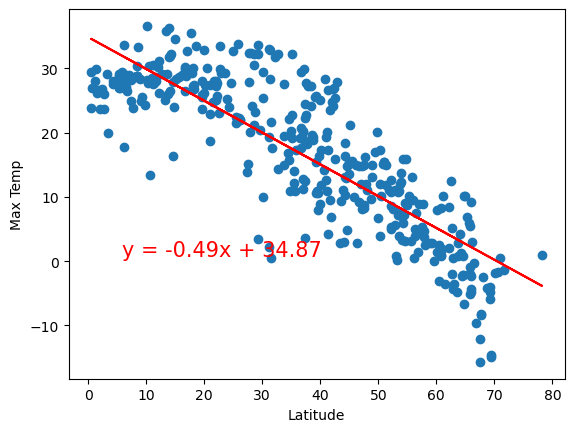

In [73]:
# Linear regression on Northern Hemisphere
# .stats is the library, then you need a function. in this case we are using linregress
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6698921210700552


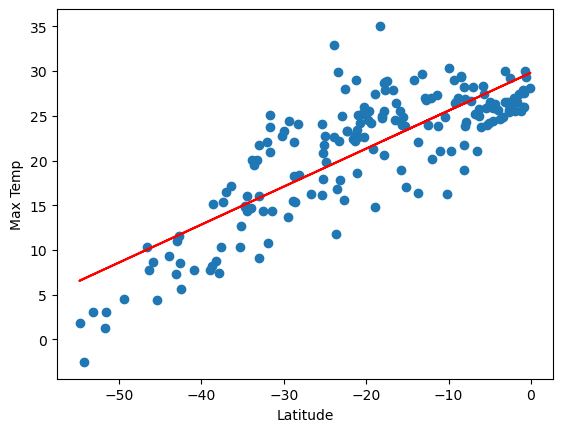

In [74]:
# Linear regression on Southern Hemisphere
# .stats is the library, then you need a function. in this case we are using linregress
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# I NEED TO DO THIS STILL !!! !! ! ! !! 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02260187133101083


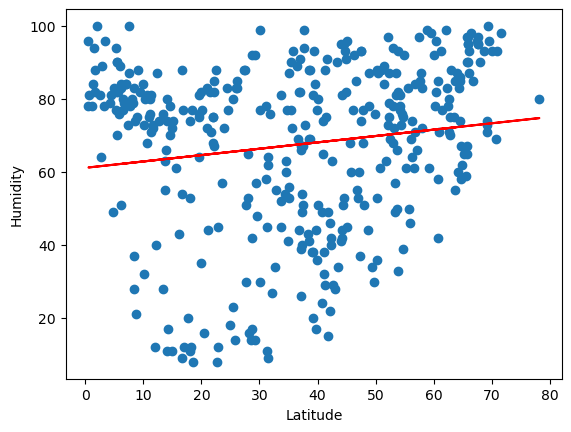

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.005322860482665699


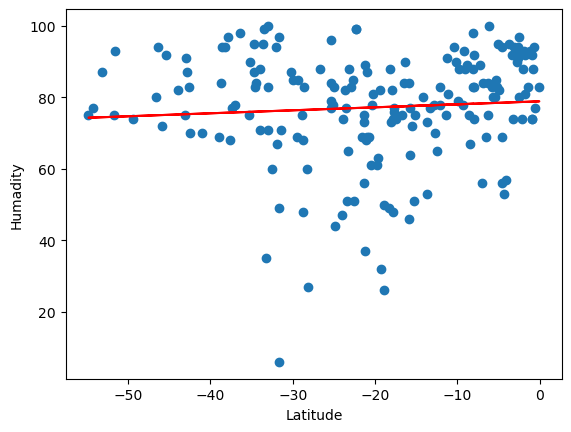

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humadity')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE


!!! ! I need to do THIS !!!! !  ! ! ! ! !! !

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005162857070990739


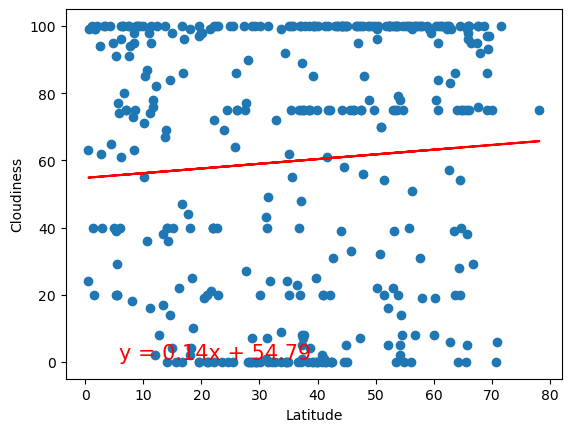

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04617874025670495


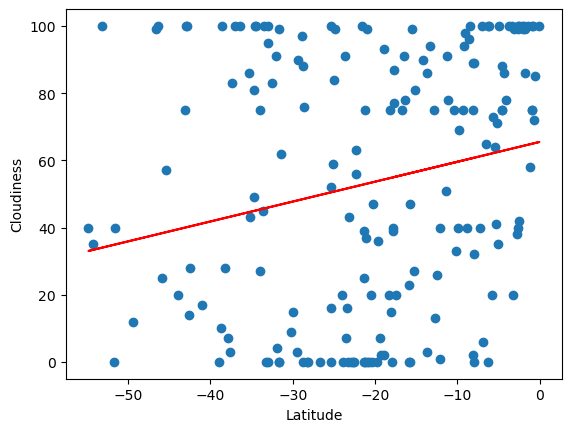

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0005363348013312168


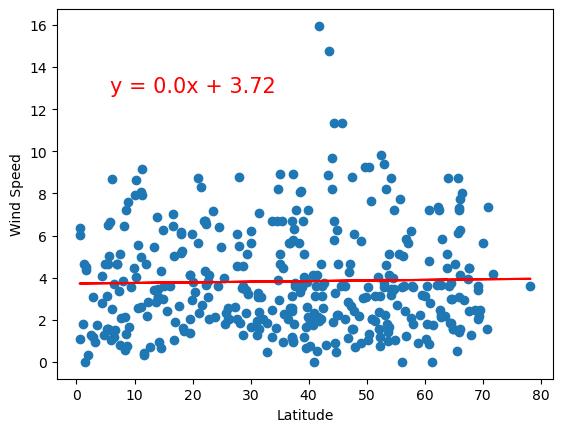

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,12.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.013513016213791421


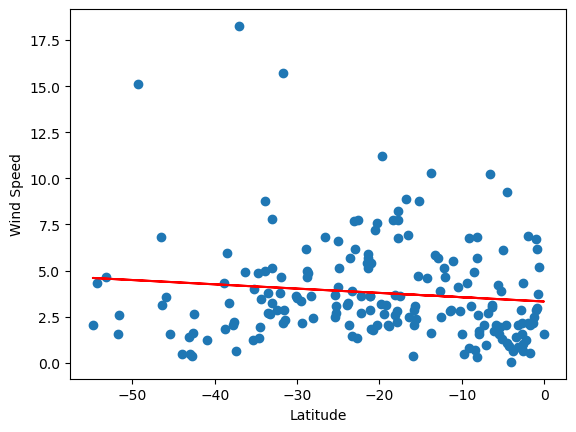

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,12.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# based on the prompt we are printing the R value, but I don't know if this should be the r value or the r squared value.
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE